<h1 align="center">Join Submission and Numeric Data Sets to Find Numeric Facts</h1>

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
# Set the format for floating point numbers to show no decimal places
pd.set_option('display.float_format', lambda x: '%.0f' % x)
# To display plots inline within the notebook
%matplotlib inline
# Set the notebook width to 100%
display(HTML("<style>.container { width:100% !important; }</style>"))

### Read Submission Data Set for 2022 Q1 from [Financial Statement Data Sets](https://www.sec.gov/dera/data/financial-statement-data-sets)

In [2]:
# Setting low_memory parameter to False to prevent mixed type inference and default_na parameter to False so that empty strings are not parsed as NaN.
submissionsQ1 = pd.read_csv('data/2022q1/sub.txt', sep='\t', low_memory=False, keep_default_na=False)

### Look at the contents of submissionsQ1 dataframe. We have 23,657 submissions. Each row has 36 columns.

In [3]:
submissionsQ1

,adsh,cik,name,sic,countryba,stprba,cityba,zipba,bas1,bas2,...,period,fy,fp,filed,accepted,prevrpt,detail,instance,nciks,aciks
0,0000016099-22-000014,16099,LUBYS INC,5812,US,TX,HOUSTON,77040,13111 NORTHWEST FREEWAY,SUITE 600,...,20220331,,,20220331,2022-03-31 16:22:00.0,0,0,lub-20220327_htm.xml,1,
1,0000018255-22-000017,18255,CATO CORP,5621,US,NC,CHARLOTTE,28273-5975,8100 DENMARK ROAD,,...,20220331,,,20220331,2022-03-31 13:27:00.0,0,0,cato8k1Q2022-CC_htm.xml,1,
2,0000049196-22-000037,49196,HUNTINGTON BANCSHARES INC /MD/,6021,US,OH,COLUMBUS,43287,HUNTINGTON CTR,41 S HIGH ST HC0917,...,20220331,,,20220331,2022-03-31 08:34:00.0,0,0,hban-20220330_htm.xml,1,
3,0000082811-22-000074,82811,REGAL REXNORD CORP,3621,US,WI,BELOIT,53511,200 STATE ST,,...,20220331,,,20220331,2022-03-31 17:17:00.0,0,0,rbc-20220328_htm.xml,1,
4,0000092230-22-000040,92230,TRUIST FINANCIAL CORP,6021,US,NC,CHARLOTTE,28202,214 NORTH TRYON STREET,,...,20220331,,,20220331,2022-03-31 17:13:00.0,0,0,tfc-20220329_htm.xml,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23652,0001757073-22-000002,1757073,ENVISTA HOLDINGS CORP,3843,US,CA,BREA,92821,"200 S. KRAEMER BLVD., BLDG. E",,...,20211231,,,20220103,2022-01-03 08:11:00.0,0,0,nvst-20211230_htm.xml,1,
23653,0001767258-22-000002,1767258,"XPEL, INC.",3470,US,TX,SAN ANTONIO,78216,618 W. SUNSET ROAD,,...,20211231,,,20220103,2022-01-03 16:53:00.0,0,0,xpel-20211229_htm.xml,1,
23654,0001820721-22-000003,1820721,"ARRAY TECHNOLOGIES, INC.",3990,US,NM,ALBUQUERQUE,87109,3901 MIDWAY PLACE NE,,...,20211231,,,20220103,2022-01-03 16:34:00.0,0,0,arry-20211228_htm.xml,1,
23655,0001823239-22-000002,1823239,"MARAVAI LIFESCIENCES HOLDINGS, INC.",2834,US,CA,SAN DIEGO,92121,10770 WATERIDGE CIRCLE SUITE 200,,...,20211231,,,20220103,2022-01-03 16:09:00.0,0,0,mrvi-20211231_htm.xml,1,


### Read Numeric Data Set for 2022 Q1 from [Financial Statement Data Sets](https://www.sec.gov/dera/data/financial-statement-data-sets)

In [4]:
# Setting low_memory parameter to False to prevent mixed type inference
numericFactsQ1 = pd.read_csv('data/2022q1/num.txt', sep='\t', low_memory=False)

### Look at contents of numericFactsQ1 dataframe. We have 3,277,301 numeric facts. Each row has 9 columns.

In [5]:
numericFactsQ1

,adsh,tag,version,coreg,ddate,qtrs,uom,value,footnote
0,0000038777-22-000013,NetIncomeLoss,us-gaap/2020,NaN,20201231,1,USD,345300000,NaN
1,0000038777-22-000013,NetIncomeLoss,us-gaap/2020,NaN,20211231,1,USD,453200000,NaN
2,0000022444-22-000014,NetIncomeLoss,us-gaap/2020,NaN,20201130,1,USD,64093000,NaN
3,0000022444-22-000014,NetIncomeLoss,us-gaap/2020,NaN,20211130,1,USD,232889000,NaN
4,0000096223-22-000006,NetIncomeLoss,us-gaap/2020,NaN,20211130,4,USD,1667403000,NaN
...,...,...,...,...,...,...,...,...,...
3277296,0001213900-22-016721,StatutoryReserves,0001213900-22-016721,NaN,20201231,0,USD,6894,NaN
3277297,0001213900-22-016721,StatutoryReserves,0001213900-22-016721,NaN,20211231,0,USD,3041397,NaN
3277298,0001213900-22-016721,TaxExpensebenefitsCalculatedAtStatutoryTaxRate,0001213900-22-016721,NaN,20201231,4,pure,0,NaN
3277299,0001213900-22-016721,TaxExpensebenefitsCalculatedAtStatutoryTaxRate,0001213900-22-016721,NaN,20211231,4,pure,0,NaN


### Join numericFactsQ1 DataFrame with submissionsQ1 DataFrame using adsh column as a join key

In [6]:
joinedFactsAndSubmissionsQ1 = numericFactsQ1.join(submissionsQ1.set_index('adsh'), on = 'adsh')

### 3,227,301 Joined Records for 2022 Q1 and 44 Columns in joinedFactsAndSubmissionsQ1 DataFrame

In [7]:
joinedFactsAndSubmissionsQ1

,adsh,tag,version,coreg,ddate,qtrs,uom,value,footnote,cik,...,period,fy,fp,filed,accepted,prevrpt,detail,instance,nciks,aciks
0,0000038777-22-000013,NetIncomeLoss,us-gaap/2020,NaN,20201231,1,USD,345300000,NaN,38777,...,20211231,2022,Q1,20220201,2022-02-01 08:45:00.0,0,1,ben-20211231_htm.xml,1,
1,0000038777-22-000013,NetIncomeLoss,us-gaap/2020,NaN,20211231,1,USD,453200000,NaN,38777,...,20211231,2022,Q1,20220201,2022-02-01 08:45:00.0,0,1,ben-20211231_htm.xml,1,
2,0000022444-22-000014,NetIncomeLoss,us-gaap/2020,NaN,20201130,1,USD,64093000,NaN,22444,...,20211130,2022,Q1,20220110,2022-01-10 15:19:00.0,0,1,cmc-20211130_htm.xml,1,
3,0000022444-22-000014,NetIncomeLoss,us-gaap/2020,NaN,20211130,1,USD,232889000,NaN,22444,...,20211130,2022,Q1,20220110,2022-01-10 15:19:00.0,0,1,cmc-20211130_htm.xml,1,
4,0000096223-22-000006,NetIncomeLoss,us-gaap/2020,NaN,20211130,4,USD,1667403000,NaN,96223,...,20211130,2021,FY,20220128,2022-01-28 16:41:00.0,0,1,jef-20211130_htm.xml,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277296,0001213900-22-016721,StatutoryReserves,0001213900-22-016721,NaN,20201231,0,USD,6894,NaN,1309251,...,20211231,2021,FY,20220331,2022-04-04 09:51:00.0,0,1,f10k2021_microalliance_htm.xml,1,
3277297,0001213900-22-016721,StatutoryReserves,0001213900-22-016721,NaN,20211231,0,USD,3041397,NaN,1309251,...,20211231,2021,FY,20220331,2022-04-04 09:51:00.0,0,1,f10k2021_microalliance_htm.xml,1,
3277298,0001213900-22-016721,TaxExpensebenefitsCalculatedAtStatutoryTaxRate,0001213900-22-016721,NaN,20201231,4,pure,0,NaN,1309251,...,20211231,2021,FY,20220331,2022-04-04 09:51:00.0,0,1,f10k2021_microalliance_htm.xml,1,
3277299,0001213900-22-016721,TaxExpensebenefitsCalculatedAtStatutoryTaxRate,0001213900-22-016721,NaN,20211231,4,pure,0,NaN,1309251,...,20211231,2021,FY,20220331,2022-04-04 09:51:00.0,0,1,f10k2021_microalliance_htm.xml,1,


### Filter for Annual Revenues for United Airlines using RevenueFromContractWithCustomerExcludingAssessedTax tag

In [8]:
# Using 4 qtrs in filter for annual revenues
revenueFilterForUnitedAirlines = (joinedFactsAndSubmissionsQ1.name == 'UNITED AIRLINES HOLDINGS, INC.') \
    & (joinedFactsAndSubmissionsQ1.tag == 'RevenueFromContractWithCustomerExcludingAssessedTax') \
    & (joinedFactsAndSubmissionsQ1.qtrs == 4) \
    & (joinedFactsAndSubmissionsQ1.coreg == 'UnitedAirLinesInc')
# Display a subset of columns
revenueFactsForUnitedAirlines = joinedFactsAndSubmissionsQ1[revenueFilterForUnitedAirlines][['name', 'tag', 'ddate', 'qtrs', 'uom', 'value']]
revenueFactsForUnitedAirlines

,name,tag,ddate,qtrs,uom,value
2231459,"UNITED AIRLINES HOLDINGS, INC.",RevenueFromContractWithCustomerExcludingAssess...,20211231,4,USD,24634000000
2231460,"UNITED AIRLINES HOLDINGS, INC.",RevenueFromContractWithCustomerExcludingAssess...,20201231,4,USD,15355000000
2231461,"UNITED AIRLINES HOLDINGS, INC.",RevenueFromContractWithCustomerExcludingAssess...,20191231,4,USD,43259000000


### Scale Revenue to Billions and Create a New Column Named valueInBillions.

In [9]:
# Divide by 1 billion 
revenueFactsForUnitedAirlines['valueInBillions'] = revenueFactsForUnitedAirlines['value'].apply(lambda x: x/1000000000)
revenueFactsForUnitedAirlines = revenueFactsForUnitedAirlines.sort_values(by = ['ddate'])
revenueFactsForUnitedAirlines

,name,tag,ddate,qtrs,uom,value,valueInBillions
2231461,"UNITED AIRLINES HOLDINGS, INC.",RevenueFromContractWithCustomerExcludingAssess...,20191231,4,USD,43259000000,43
2231460,"UNITED AIRLINES HOLDINGS, INC.",RevenueFromContractWithCustomerExcludingAssess...,20201231,4,USD,15355000000,15
2231459,"UNITED AIRLINES HOLDINGS, INC.",RevenueFromContractWithCustomerExcludingAssess...,20211231,4,USD,24634000000,25


### Create a Bar Chart for Annual Revenue of United Airlines.

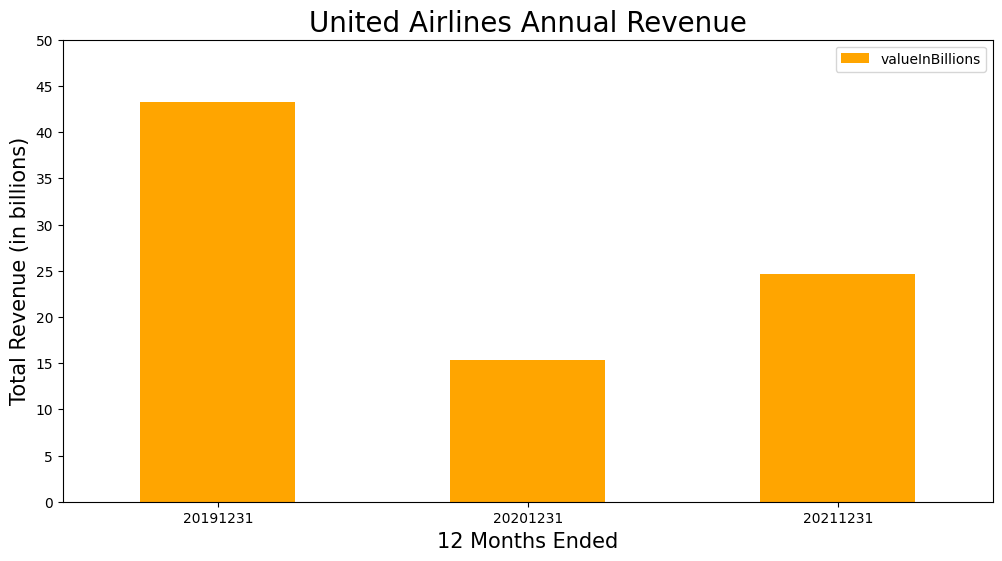

In [10]:
# Create a bar chart with data date (ddate) on x axis and annual revenue (valueInBillions) on y axis
revenueFactsForUnitedAirlines.plot(x='ddate', y='valueInBillions', kind='bar', figsize=(12,6), color='orange')
# Set title and labels for x & y axes
plt.title('United Airlines Annual Revenue',fontsize=20)
plt.xlabel('12 Months Ended', fontsize=15)
plt.ylabel('Total Revenue (in billions)', fontsize=15)
plt.ticklabel_format(axis="y", style="plain")
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 51, step=5))
# Save the bar chart as a file in images folder
plt.savefig('images/UnitedAirlinesRevenue.jpg')
plt.show()

### Filter for Annual Revenue of American Airlines and Scale Revenue to Billions

In [11]:
revenueFilterForAmericanAirlines = (joinedFactsAndSubmissionsQ1.name == 'AMERICAN AIRLINES GROUP INC.') \
    & (joinedFactsAndSubmissionsQ1.tag == 'RevenueFromContractWithCustomerExcludingAssessedTax') \
    & (joinedFactsAndSubmissionsQ1.qtrs == 4) \
    & (joinedFactsAndSubmissionsQ1.coreg == 'AmericanAirlinesInc')
revenueFactsForAmerican = joinedFactsAndSubmissionsQ1[revenueFilterForAmericanAirlines][['name', 'tag', 'ddate', 'qtrs', 'uom', 'value']]
revenueFactsForAmerican['valueInBillions'] = revenueFactsForAmerican['value'].apply(lambda x: x/1000000000)
revenueFactsForAmerican = revenueFactsForAmerican.sort_values(by = ['ddate'])
revenueFactsForAmerican

,name,tag,ddate,qtrs,uom,value,valueInBillions
2228670,AMERICAN AIRLINES GROUP INC.,RevenueFromContractWithCustomerExcludingAssess...,20191231,4,USD,45761000000,46
2228672,AMERICAN AIRLINES GROUP INC.,RevenueFromContractWithCustomerExcludingAssess...,20201231,4,USD,17335000000,17
2228671,AMERICAN AIRLINES GROUP INC.,RevenueFromContractWithCustomerExcludingAssess...,20211231,4,USD,29880000000,30


### Append American's Revenue DataFrame to United's Revenue DataFrame

In [12]:
revenueFacts = pd.concat([revenueFactsForUnitedAirlines, revenueFactsForAmerican], ignore_index=True).sort_values(by = ['ddate'])
revenueFacts

,name,tag,ddate,qtrs,uom,value,valueInBillions
0,"UNITED AIRLINES HOLDINGS, INC.",RevenueFromContractWithCustomerExcludingAssess...,20191231,4,USD,43259000000,43
3,AMERICAN AIRLINES GROUP INC.,RevenueFromContractWithCustomerExcludingAssess...,20191231,4,USD,45761000000,46
1,"UNITED AIRLINES HOLDINGS, INC.",RevenueFromContractWithCustomerExcludingAssess...,20201231,4,USD,15355000000,15
4,AMERICAN AIRLINES GROUP INC.,RevenueFromContractWithCustomerExcludingAssess...,20201231,4,USD,17335000000,17
2,"UNITED AIRLINES HOLDINGS, INC.",RevenueFromContractWithCustomerExcludingAssess...,20211231,4,USD,24634000000,25
5,AMERICAN AIRLINES GROUP INC.,RevenueFromContractWithCustomerExcludingAssess...,20211231,4,USD,29880000000,30


### Visualize Revenue for Both Airlines

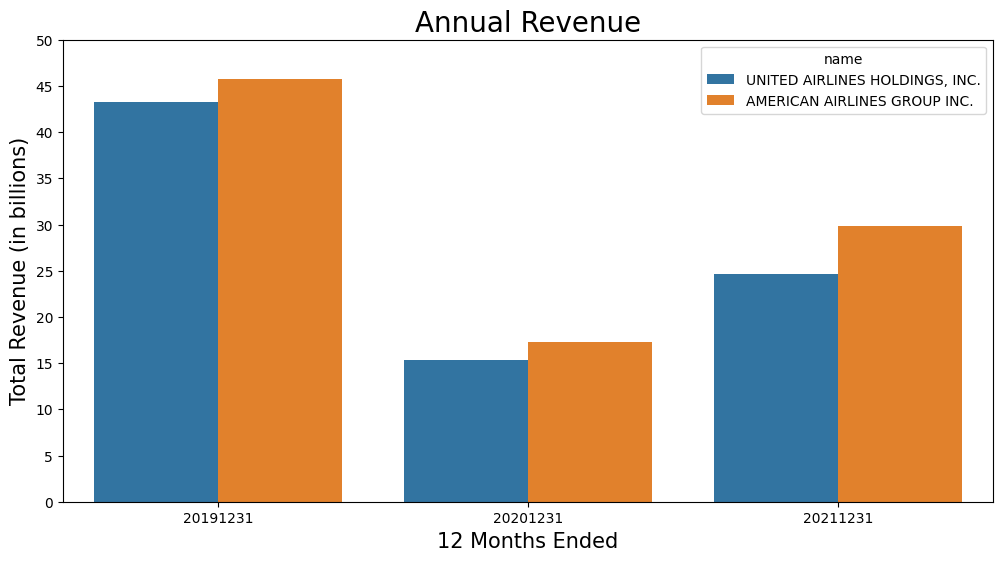

In [13]:
plt.figure(figsize=(12,6))
# Create a bar chart with ddate on x axis and valueInBillions on y axis. The hue parameter is set to filer name for color encoding
sns.barplot(x="ddate", y="valueInBillions", hue="name", data=revenueFacts)
# Set title and labels for x & y axes
plt.title('Annual Revenue',fontsize=20)
plt.xlabel('12 Months Ended', fontsize=15)
plt.ylabel('Total Revenue (in billions)', fontsize=15)
plt.ticklabel_format(axis="y", style="plain")
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 51, step=5))
# Save the bar chart as a file in images folder
plt.savefig('images/RevenueBenchmarking.jpg')
plt.show()

### Filter for Income Tax for Both Airlines using IncomeTaxExpenseBenefit tag

In [14]:
taxFilterForUnitedAirlines = (joinedFactsAndSubmissionsQ1.name == 'UNITED AIRLINES HOLDINGS, INC.') \
    & (joinedFactsAndSubmissionsQ1.tag == 'IncomeTaxExpenseBenefit') \
    & (joinedFactsAndSubmissionsQ1.qtrs == 4) \
    & (joinedFactsAndSubmissionsQ1.coreg == 'UnitedAirLinesInc')
taxFactsForUnitedAirlines = joinedFactsAndSubmissionsQ1[taxFilterForUnitedAirlines][['name', 'qtrs', 'ddate', 'uom', 'value']]
taxFactsForUnitedAirlines['valueInMillions'] = taxFactsForUnitedAirlines['value'].apply(lambda x: x/1000000)
taxFilterForAmericanAirlines = (joinedFactsAndSubmissionsQ1.name == 'AMERICAN AIRLINES GROUP INC.') \
    & (joinedFactsAndSubmissionsQ1.tag == 'IncomeTaxExpenseBenefit') \
    & (joinedFactsAndSubmissionsQ1.qtrs == 4) \
    & (joinedFactsAndSubmissionsQ1.coreg == 'AmericanAirlinesInc')
taxFactsForAmerican = joinedFactsAndSubmissionsQ1[taxFilterForAmericanAirlines][['name', 'qtrs', 'ddate', 'uom', 'value']]
taxFactsForAmerican['valueInMillions'] = taxFactsForAmerican['value'].apply(lambda x: x/1000000)
taxFacts = pd.concat([taxFactsForUnitedAirlines, taxFactsForAmerican], ignore_index=True).sort_values(by = ['ddate'])
taxFacts

,name,qtrs,ddate,uom,value,valueInMillions
2,"UNITED AIRLINES HOLDINGS, INC.",4,20191231,USD,905000000,905
5,AMERICAN AIRLINES GROUP INC.,4,20191231,USD,633000000,633
1,"UNITED AIRLINES HOLDINGS, INC.",4,20201231,USD,-1753000000,-1753
4,AMERICAN AIRLINES GROUP INC.,4,20201231,USD,-2453000000,-2453
0,"UNITED AIRLINES HOLDINGS, INC.",4,20211231,USD,-593000000,-593
3,AMERICAN AIRLINES GROUP INC.,4,20211231,USD,-500000000,-500


### Visualize Income Tax for Both Airlines

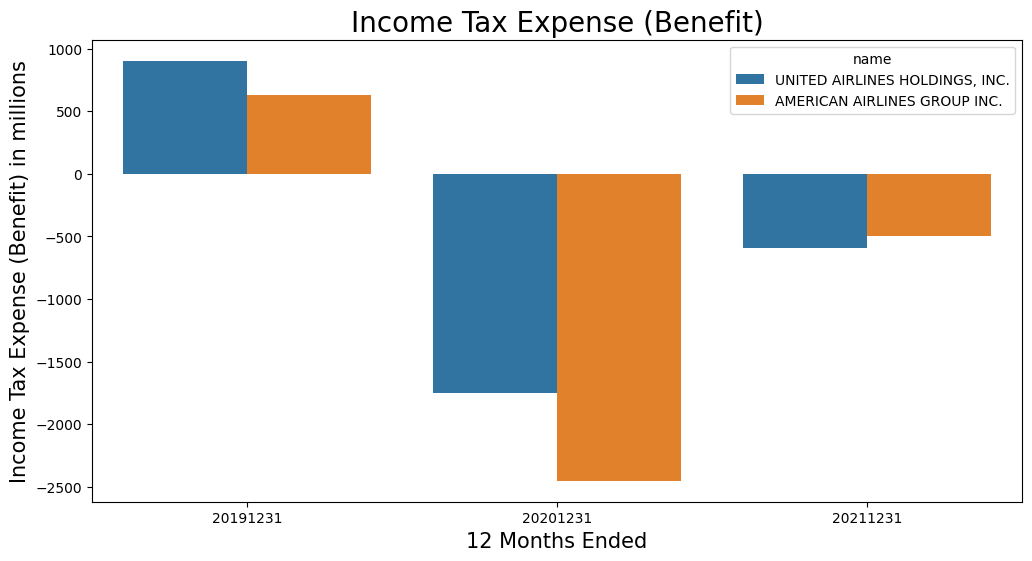

In [15]:
plt.figure(figsize=(12,6))
# Create a bar chart with ddate on x axis and income tax expense (valueInMillions) on y axis. The hue parameter is set to filer name for color encoding
sns.barplot(x="ddate", hue="name", y="valueInMillions", data=taxFacts)
# Set title and labels for x & y axes
plt.title('Income Tax Expense (Benefit)',fontsize=20)
plt.xlabel('12 Months Ended', fontsize=15)
plt.ylabel('Income Tax Expense (Benefit) in millions', fontsize=15)
plt.ticklabel_format(axis="y", style="plain")
plt.xticks(rotation=0)
plt.yticks(np.arange(-2500, 1050, step=500))
# Save the bar chart as a file in images folder
plt.savefig('images/TaxBenchmarking.jpg')
plt.show()